In [ ]:
# Task 3: Customer Segmentation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#| Feature            | Example Segmentation Buckets                              |
#| ------------------ | --------------------------------------------------------- |
#| **Tenure**         | Short (<12 months), Mid (12–24 months), Long (>24 months) |
#| **MonthlyCharges** | Low (<\$50), Medium (\$50–\$80), High (>\$80)             |
#| **Contract Type**  | Month-to-month, One year, Two year                        |


In [3]:
df = pd.read_csv('Telco_Customer_Churn_Dataset  (1).csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Clean TotalCharges
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce').fillna(0)

In [5]:
# --- Step 1: Create Segments ---

def tenure_segment(x):
    if x < 12:
        return 'Short'
    elif x < 24:
        return 'Mid'
    else:
        return 'Long'

def charge_segment(x):
    if x < 50:
        return 'Low'
    elif x < 80:
        return 'Medium'
    else:
        return 'High'

df['TenureSegment'] = df['tenure'].apply(tenure_segment)
df['ChargeSegment'] = df['MonthlyCharges'].apply(charge_segment)

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureSegment,ChargeSegment
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Short,Low
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,Long,Medium
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Short,Medium
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Long,Low
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Short,Medium


In [8]:
# --- Step 2: Analyze Churn by Segments ---
segmentation = df.groupby(['TenureSegment', 'ChargeSegment', 'Contract'])['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100

print("Churn Rates by Segment (in %):")
print(segmentation)

Churn Rates by Segment (in %):
Churn                                               No        Yes
TenureSegment ChargeSegment Contract                             
Long          High          Month-to-month   61.711080  38.288920
                            One year         80.890538  19.109462
                            Two year         94.770206   5.229794
              Low           Month-to-month   84.482759  15.517241
                            One year         97.142857   2.857143
                            Two year         98.823529   1.176471
              Medium        Month-to-month   75.873016  24.126984
                            One year         92.634561   7.365439
                            Two year         97.553517   2.446483
Mid           High          Month-to-month   46.913580  53.086420
                            One year         75.000000  25.000000
                            Two year        100.000000   0.000000
              Low           Month-to-month   

C:\Users\Varun\AppData\Local\Temp\ipykernel_19888\1112779438.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contract', y=df['Churn'].apply(lambda x: 1 if x=='Yes' else 0), data=df, estimator='mean', palette='Set2')


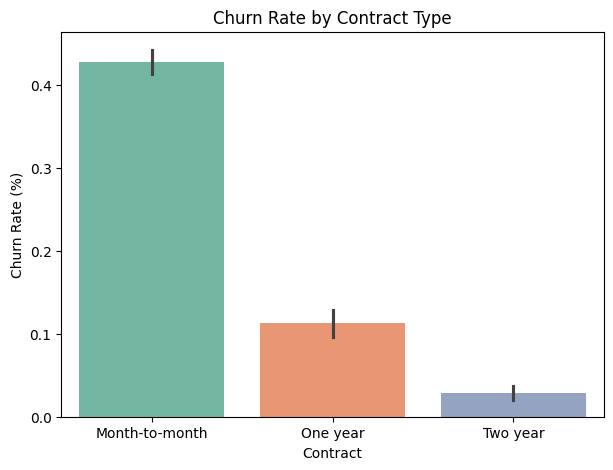

In [9]:
# --- Step 3: Visualizations ---

# 1. Churn Rate by Contract Type
plt.figure(figsize=(7,5))
sns.barplot(x='Contract', y=df['Churn'].apply(lambda x: 1 if x=='Yes' else 0), data=df, estimator='mean', palette='Set2')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Contract Type')
plt.show()

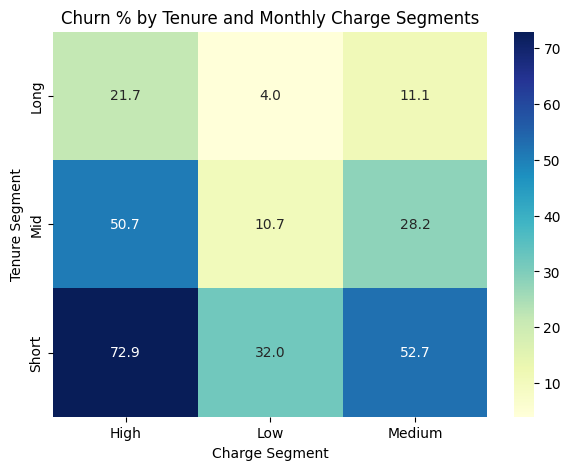

In [10]:
# 2. Heatmap: Churn Rate by Tenure & Charge Segment
heatmap_data = df.groupby(['TenureSegment','ChargeSegment'])['Churn'] \
    .apply(lambda x: (x=='Yes').mean()*100).unstack()

plt.figure(figsize=(7,5))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Churn % by Tenure and Monthly Charge Segments')
plt.ylabel('Tenure Segment')
plt.xlabel('Charge Segment')
plt.show()


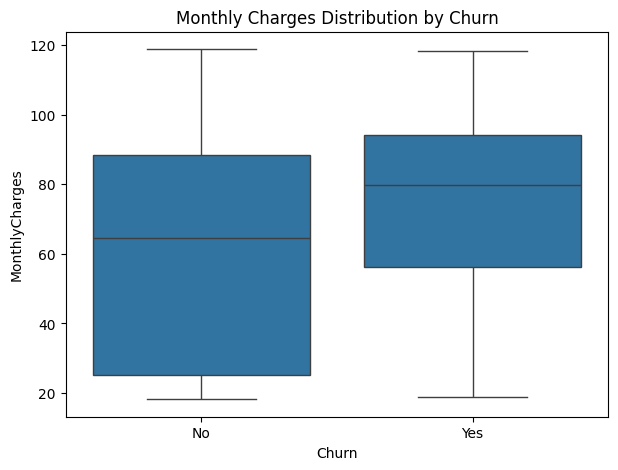

In [12]:
# 3. Boxplot: Monthly Charges by Churn
plt.figure(figsize=(7,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges Distribution by Churn')
plt.show()